In [75]:
%matplotlib inline
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feyn
from sklearn.model_selection import train_test_split
import xgboost as xg 
from sklearn.svm import SVR 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler

In [76]:
# data = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/6-clean/clean_preprocessed_02.csv')
# data = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/7-usable/2-daily_data.csv')
data = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/7-usable/1-daily_data.csv')

In [77]:
data.head()

,Unnamed: 0,date,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,...,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median
0,0,1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,...,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575
1,1,1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,...,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998
2,2,1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,...,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198
3,3,1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,...,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177
4,4,1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,...,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188


In [78]:
data.tail()

,Unnamed: 0,date,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,...,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median
9126,9126,2018-12-27,-2.541667,-6.575000,74.166667,17.750000,23.633333,100.791667,-9.166667,15698.625000,...,23.633333,24.1,99.31,101.50,100.791667,101.075,-11.155717,0.336425,-5.917272,-5.212529
9127,9127,2018-12-28,8.016667,6.254167,88.833333,15.750000,17.204167,98.661667,NaN,14809.208333,...,17.204167,24.1,98.37,99.21,98.661667,98.635,0.738694,13.912823,7.868511,8.262797
9128,9128,2018-12-29,-2.525000,-7.520833,68.875000,19.916667,24.033333,99.903750,-9.722222,15135.791667,...,24.033333,24.1,98.85,100.43,99.903750,100.135,-11.125707,1.291505,-6.063010,-7.026121
9129,9129,2018-12-30,-2.404167,-5.829167,77.666667,10.958333,19.358333,99.869167,-6.150000,15326.625000,...,19.358333,24.1,99.65,100.15,99.869167,99.870,-10.147759,-2.448366,-5.735336,-4.982904
9130,9130,2018-12-31,1.204167,-1.645833,81.708333,10.458333,18.091667,99.302500,-3.000000,15016.208333,...,18.091667,24.1,97.37,100.03,99.302500,99.695,-5.229812,3.073132,-1.278330,0.062595


In [79]:
print(data['date'].head())


0    1994-01-01
1    1994-01-02
2    1994-01-03
3    1994-01-04
4    1994-01-05
Name: date, dtype: object


In [80]:
print(data.dtypes)

Unnamed: 0                 int64
date                      object
temp                     float64
dew_point_temp           float64
rel_hum                  float64
wind_speed               float64
visibility               float64
press                    float64
wind_chill               float64
hourly_demand            float64
hmdxx                    float64
temp_min                 float64
temp_max                 float64
temp_mean                float64
temp_median              float64
dew_point_temp_min       float64
dew_point_temp_max       float64
dew_point_temp_mean      float64
dew_point_temp_median    float64
rel_hum_min              float64
rel_hum_max              float64
rel_hum_mean             float64
rel_hum_median           float64
visibility_min           float64
visibility_max           float64
visibility_mean          float64
visibility_median        float64
press_min                float64
press_max                float64
press_mean               float64
press_medi

In [81]:
# data.drop(columns='Unnamed: 0', inplace=True)

In [82]:
data.head()

,Unnamed: 0,date,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,...,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median
0,0,1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,...,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575
1,1,1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,...,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998
2,2,1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,...,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198
3,3,1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,...,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177
4,4,1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,...,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188


In [83]:
data['date'] = pd.to_datetime(data['date'])

print(data['date'].head())  # Verify the datetime format


0   1994-01-01
1   1994-01-02
2   1994-01-03
3   1994-01-04
4   1994-01-05
Name: date, dtype: datetime64[ns]


In [84]:
specific_datetime = pd.Timestamp('2018-01-01')
row = data[data['date'] == specific_datetime]

In [85]:
print(row)

      Unnamed: 0       date       temp  dew_point_temp    rel_hum  wind_speed   
8766        8766 2018-01-01 -14.691667      -19.504167  67.541667        19.5  \

      visibility      press  wind_chill  hourly_demand  ...  visibility_mean   
8766   23.566667  100.66375       -22.5   16930.833333  ...        23.566667  \

      visibility_median  press_min  press_max  press_mean  press_median   
8766               24.1     100.36      100.9   100.66375       100.685  \

      hmdxx_min  hmdxx_max  hmdxx_mean  hmdxx_median  
8766 -26.823227 -13.184201  -19.487769    -18.713991  

[1 rows x 35 columns]


In [86]:
data.set_index('date', inplace=True)

In [87]:
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek

In [88]:
data.head()

,Unnamed: 0,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,hmdxx,...,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,year,month,day,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
1994-01-01,0,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,...,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1994,1,1,5
1994-01-02,1,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,...,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,1994,1,2,6
1994-01-03,2,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,...,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,1994,1,3,0
1994-01-04,3,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,...,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,1994,1,4,1
1994-01-05,4,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,...,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,1994,1,5,2


In [89]:
data.columns

Index(['Unnamed: 0', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed',
       'visibility', 'press', 'wind_chill', 'hourly_demand', 'hmdxx',
       'temp_min', 'temp_max', 'temp_mean', 'temp_median',
       'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean',
       'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean',
       'visibility_median', 'press_min', 'press_max', 'press_mean',
       'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median',
       'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [90]:
data.drop(columns=['wind_chill', 'temp', 'dew_point_temp', 'rel_hum', 'visibility', 'press', 'hmdxx'] , inplace=True)

In [91]:
# print(row)

In [92]:
# data.rename(columns = {'Unnamed: 0':'date'}, inplace = True)
# print(data)

In [93]:
# data['date'].dtypes

In [94]:
print(data.index)

DatetimeIndex(['1994-01-01', '1994-01-02', '1994-01-03', '1994-01-04',
               '1994-01-05', '1994-01-06', '1994-01-07', '1994-01-08',
               '1994-01-09', '1994-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=9131, freq=None)


In [95]:
# data = data.reset_index()

In [96]:
# data['datetime'] = data['datetime'].astype('category')

In [97]:
# data.drop(columns = 'datetime', inplace=True)

In [98]:
data.rename(columns={'hourly_demand':'daily_demand'}, inplace=True)

In [99]:
data.head()

,Unnamed: 0,wind_speed,daily_demand,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,...,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,year,month,day,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
1994-01-01,0,20.333333,14655.208333,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,...,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1994,1,1,5
1994-01-02,1,17.875000,15783.333333,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,...,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,1994,1,2,6
1994-01-03,2,17.666667,18992.708333,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,...,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,1994,1,3,0
1994-01-04,3,25.791667,19080.708333,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,...,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,1994,1,4,1
1994-01-05,4,22.875000,19183.208333,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,...,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,1994,1,5,2


In [100]:
data.isnull().sum()

Unnamed: 0               0
wind_speed               0
daily_demand             0
temp_min                 0
temp_max                 0
temp_mean                0
temp_median              0
dew_point_temp_min       0
dew_point_temp_max       0
dew_point_temp_mean      0
dew_point_temp_median    0
rel_hum_min              0
rel_hum_max              0
rel_hum_mean             0
rel_hum_median           0
visibility_min           0
visibility_max           0
visibility_mean          0
visibility_median        0
press_min                0
press_max                0
press_mean               0
press_median             0
hmdxx_min                0
hmdxx_max                0
hmdxx_mean               0
hmdxx_median             0
year                     0
month                    0
day                      0
day_of_week              0
dtype: int64

In [101]:
# data.drop(columns='wind_chill', inplace=True)

In [102]:
data['Unnamed: 0'].dtype

dtype('int64')

In [103]:
x = data.loc[:, data.columns != 'daily_demand'].values
y = data.loc[:, 'daily_demand'].values

#y = data.loc[:, 'hourly_demand'].values

In [104]:
# x_graph = data.iloc[8766:, data.columns != 'hourly_demand'].values
# pred_graph = data.iloc[8766:, 'hourly_demand'].values


rows_to_select = 8766

# Select all columns except 'hourly_demand'
columns_except_hourly_demand = data.columns != 'daily_demand'

# Extract x_graph using iloc and boolean indexing for columns
x_graph = data.iloc[rows_to_select:, columns_except_hourly_demand].values

# Extract pred_graph using iloc and direct indexing for the specific column
pred_graph = data.iloc[rows_to_select:]['daily_demand'].values

In [105]:
print(pred_graph.shape)


(365,)


In [106]:
data.drop(columns='Unnamed: 0', inplace=True)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [108]:
print(x_graph.shape)
print(x.shape)
print(pred_graph.shape)


(365, 30)
(9131, 30)
(365,)


In [109]:
qtrain, qtest = feyn.tools.split(data, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([19286.5       , 19597.5       , 17777.58333333, ...,
       17969.25      , 15876.79166667, 16649.95833333])

In [110]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtrain,
    output_name='daily_demand'
)
best = qmodels[0]

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="308.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 771 308.0" width="771" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="215.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="80.0"><title>daily_demand
linear:
scale=5890.770833
scale offset=0.000000
w=-6.477959
bias=3.6560</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="89.0">out</text><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">1</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="88.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="127.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>temp_max
linear:
scale=0.035211
scale offset=13.044077
w=-0.906207
bias=0.0682</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">temp_max</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="110.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="131.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="119.0">3</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="118.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="127.5" y2="136.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">4</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="67.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>wind_speed
linear:
scale=0.044077
scale offset=15.804749
w=-0.907548
bias=2.3394</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">wind_speed</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="110.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="mono
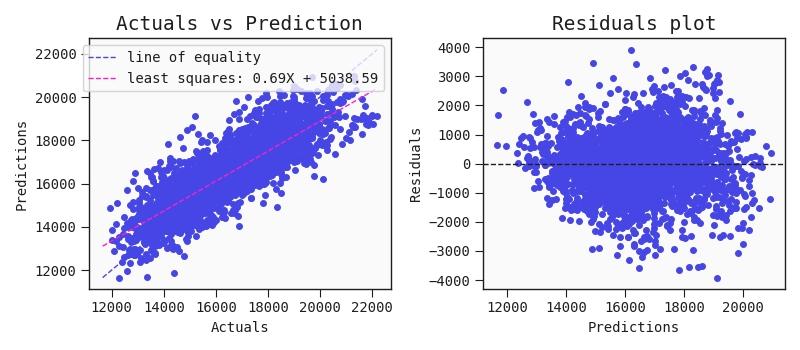

In [111]:
best.plot(qtest)